<a href="https://colab.research.google.com/github/kate-patricia/UTS_ML2019_ID12403147/blob/master/ML_A2_Practical_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GITHUB LINK: [CLICK HERE](https://github.com/kate-patricia/UTS_ML2019_ID12403147/blob/master/ML_A2_Practical_Project.ipynb)

# Code Area

### Exploration

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt # for visualization in Python
%matplotlib inline
import seaborn as sns 
sns.set()

from sklearn.model_selection import train_test_split
missing_values = ['?']
dating_data = pd.read_csv('https://www.openml.org/data/get_csv/13153954/speeddating.arff', na_values=missing_values)

# the first lines of the DataFrame
dating_data.head()

# the last lines of the DataFrame
dating_data.tail()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,...,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
8373,1,21,male,25.0,26.0,1,[0-1],European/Caucasian-American,'Latino/Hispanic American',0,1.0,1.0,[0-1],[0-1],'Climate Dynamics',10.0,10.0,30.0,20.0,10.0,15.0,[0-15],[0-15],[21-100],[16-20],[0-15],[0-15],10.0,5.0,3.0,2.0,6.0,5.0,[9-10],[0-5],[0-5],[0-5],[6-8],[0-5],70.0,...,3.0,7.0,9.0,10.0,10.0,7.0,3.0,[6-8],[0-5],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[9-10],[6-8],[0-5],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],0.64,[0.33-1],10.0,NaN,3.0,[7-10],[0-3],[3-5],2.0,5.0,[0-5],[5-6],0.0,0,1,0
8374,1,21,male,25.0,24.0,1,[0-1],European/Caucasian-American,Other,0,1.0,1.0,[0-1],[0-1],'Climate Dynamics',50.0,20.0,10.0,5.0,10.0,5.0,[21-100],[16-20],[0-15],[0-15],[0-15],[0-15],6.0,3.0,7.0,3.0,7.0,2.0,[6-8],[0-5],[6-8],[0-5],[6-8],[0-5],70.0,...,3.0,7.0,9.0,10.0,10.0,7.0,3.0,[6-8],[0-5],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[9-10],[6-8],[0-5],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],0.71,[0.33-1],10.0,NaN,3.0,[7-10],[0-3],[3-5],4.0,4.0,[0-5],[0-4],0.0,0,0,0
8375,1,21,male,25.0,29.0,4,[4-6],European/Caucasian-American,'Latino/Hispanic American',0,1.0,1.0,[0-1],[0-1],'Climate Dynamics',40.0,10.0,30.0,10.0,10.0,NaN,[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],2.0,1.0,2.0,2.0,2.0,1.0,[0-5],[0-5],[0-5],[0-5],[0-5],[0-5],70.0,...,3.0,7.0,9.0,10.0,10.0,7.0,3.0,[6-8],[0-5],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[9-10],[6-8],[0-5],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],-0.46,[-1-0],10.0,NaN,3.0,[7-10],[0-3],[3-5],6.0,5.0,[6-8],[5-6],0.0,0,0,0
8376,1,21,male,25.0,22.0,3,[2-3],European/Caucasian-American,'Asian/Pacific Islander/Asian-American',0,1.0,1.0,[0-1],[0-1],'Climate Dynamics',10.0,25.0,25.0,10.0,10.0,20.0,[0-15],[21-100],[21-100],[0-15],[0-15],[16-20],5.0,7.0,5.0,5.0,3.0,6.0,[0-5],[6-8],[0-5],[0-5],[0-5],[6-8],70.0,...,3.0,7.0,9.0,10.0,10.0,7.0,3.0,[6-8],[0-5],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[9-10],[6-8],[0-5],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],0.62,[0.33-1],10.0,NaN,3.0,[7-10],[0-3],[3-5],5.0,5.0,[0-5],[5-6],0.0,0,1,0
8377,1,21,male,25.0,22.0,3,[2-3],European/Caucasian-American,'Asian/Pacific Islander/Asian-American',0,1.0,1.0,[0-1],[0-1],'Climate Dynamics',20.0,20.0,10.0,15.0,5.0,30.0,[16-20],[16-20],[0-15],[0-15],[0-15],[21-100],8.0,8.0,7.0,7.0,7.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],70.0,...,3.0,7.0,9.0,10.0,10.0,7.0,3.0,[6-8],[0-5],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[9-10],[6-8],[0-5],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],0.01,[0-0.33],10.0,NaN,3.0,[7-10],[0-3],[3-5],4.0,5.0,[0-5],[5-6],0.0,0,1,0


In [0]:
dating_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
has_null                           8378 non-null int64
wave                               8378 non-null int64
gender                             8378 non-null object
age                                8283 non-null float64
age_o                              8274 non-null float64
d_age                              8378 non-null int64
d_d_age                            8378 non-null object
race                               8315 non-null object
race_o                             8305 non-null object
samerace                           8378 non-null int64
importance_same_race               8299 non-null float64
importance_same_religion           8299 non-null float64
d_importance_same_race             8378 non-null object
d_importance_same_religion         8378 non-null object
field                              8315 non-null object
pref_o_attractive                  8289 non-null flo

In [0]:
# numerical features in the dataset
numeric_features = dating_data.select_dtypes(include=[np.number])
numeric_features.columns

# categorical features in the dataset
categorical_features = dating_data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['gender', 'd_d_age', 'race', 'race_o', 'd_importance_same_race',
       'd_importance_same_religion', 'field', 'd_pref_o_attractive',
       'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny',
       'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'd_attractive_o',
       'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o',
       'd_shared_interests_o', 'd_attractive_important', 'd_sincere_important',
       'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_

### Dropping Redundant Features

In [0]:
from functools import reduce
drop_col_ids_raw = [0,5,6,9,list(range(12,15)),list(range(21,27)),list(range(33,39)),list(range(45,51)),list(range(56,61)),list(range(67,107)),108,110,111,list(range(112,115)),117,118,120,121]
drop_col_ids = [[_] if not isinstance(_, list) else _ for _ in drop_col_ids_raw]
drop_col_ids = reduce( lambda x, y:x+y, drop_col_ids)
all_cols = dating_data.columns
keep_cols = [_ for i_, _ in enumerate(all_cols) if i_ not in drop_col_ids]
dd_dropped = dating_data[keep_cols]

### Missing Values

In [0]:
# Total missing values for each feature
print(dd_dropped.isnull().sum())
print(len(dd_dropped))

wave                                0
gender                              0
age                                95
age_o                             104
race                               63
race_o                             73
importance_same_race               79
importance_same_religion           79
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive  

,Total,Percent
shared_interests_o,1076,0.128432
shared_interests_partner,1067,0.127357
ambitous_o,722,0.086178
ambition_partner,712,0.084984
met,375,0.044760


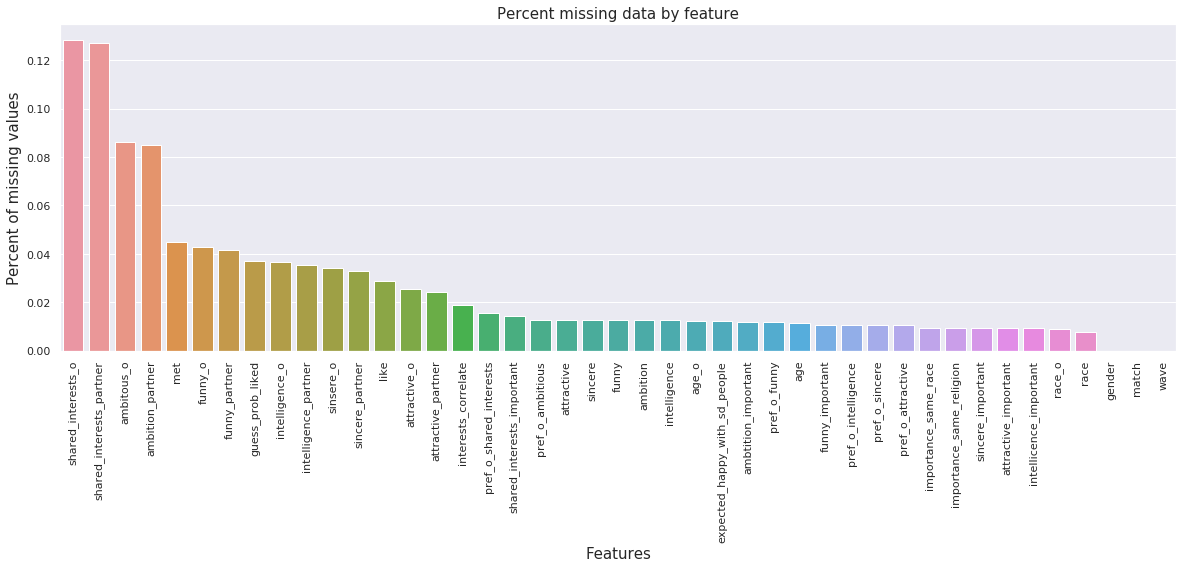

In [0]:
# Statistical details of missing values
total = dd_dropped.isnull().sum().sort_values(ascending=False)
percent = (dd_dropped.isnull().sum()/dd_dropped.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(20, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [0]:
# dropping rows that have less than 39 non N/A fields - do not want to exceed more than 5% dropped.
new_data = dd_dropped.dropna(axis = 0, how ='any',thresh=37) 
  
# comparing sizes of data frames 
print("Old data frame length: ", len(dating_data), "\nNew data frame length: ",
       len(new_data), "\nNumber of rows dropped: ", (len(dd_dropped)-len(new_data)))
print("\nSummary of Missing Values:")
print(new_data.isnull().sum())

Old data frame length:  8378 
New data frame length:  8012 
Number of rows dropped:  366

Summary of Missing Values:
wave                               0
gender                             0
age                               26
age_o                             26
race                               0
race_o                             0
importance_same_race               0
importance_same_religion           0
pref_o_attractive                  0
pref_o_sincere                     0
pref_o_intelligence                0
pref_o_funny                       9
pref_o_ambitious                  18
pref_o_shared_interests           38
attractive_o                      47
sinsere_o                        118
intelligence_o                   137
funny_o                          193
ambitous_o                       547
shared_interests_o               895
attractive_important               0
sincere_important                  0
intellicence_important             0
funny_important                 

,Total,Percent
shared_interests_o,895,0.111707
shared_interests_partner,858,0.107089
ambitous_o,547,0.068273
ambition_partner,510,0.063655
funny_o,193,0.024089


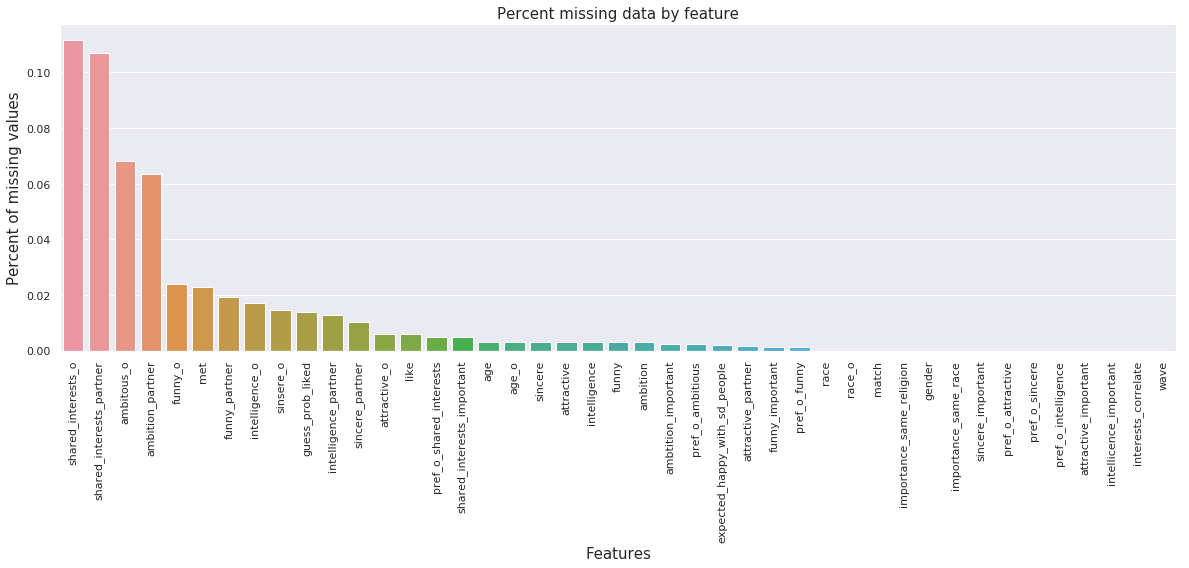

In [0]:
# Statistical details of missing values in new_data
total = new_data.isnull().sum().sort_values(ascending=False)
percent = (new_data.isnull().sum()/new_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(20, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [0]:
new_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 0 to 8377
Data columns (total 43 columns):
wave                             8012 non-null int64
gender                           8012 non-null object
age                              7986 non-null float64
age_o                            7986 non-null float64
race                             8012 non-null object
race_o                           8012 non-null object
importance_same_race             8012 non-null float64
importance_same_religion         8012 non-null float64
pref_o_attractive                8012 non-null float64
pref_o_sincere                   8012 non-null float64
pref_o_intelligence              8012 non-null float64
pref_o_funny                     8003 non-null float64
pref_o_ambitious                 7994 non-null float64
pref_o_shared_interests          7974 non-null float64
attractive_o                     7965 non-null float64
sinsere_o                        7894 non-null float64
intelligence_o    

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Total,Percent
met,183,0.022841
attractive_important,0,0.000000
shared_interests_o,0,0.000000
ambitous_o,0,0.000000
funny_o,0,0.000000


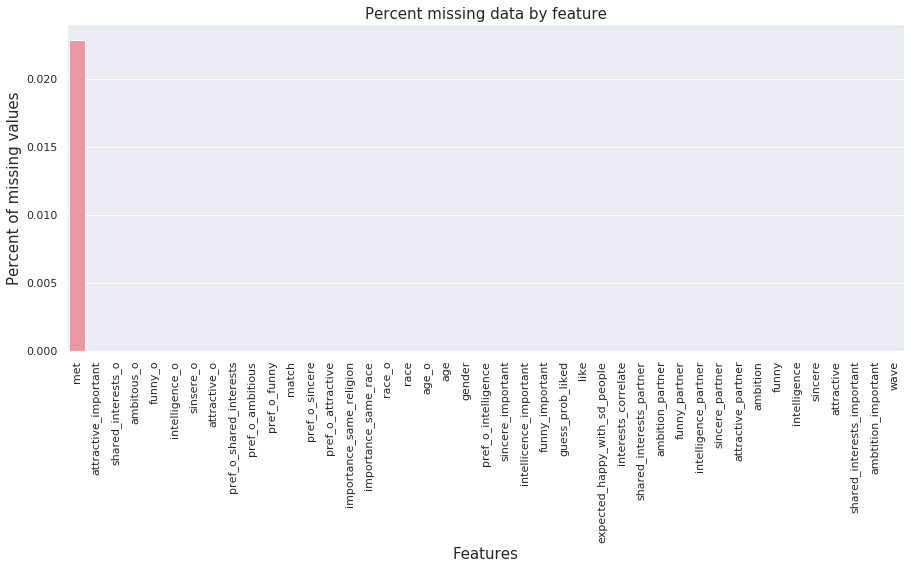

In [0]:
# Filling with '0' for features with grading values
# Missing values are treated as responses with the lowerest value '0'
new_data.shared_interests_o.fillna(0,inplace=True)
new_data.shared_interests_partner.fillna(0,inplace=True)
new_data.ambitous_o.fillna(0,inplace=True)
new_data.ambition_partner.fillna(0,inplace=True)
new_data.funny_o.fillna(0,inplace=True)
new_data.funny_partner.fillna(0,inplace=True)
new_data.intelligence_o.fillna(0,inplace=True)
new_data.sinsere_o.fillna(0,inplace=True)
new_data.guess_prob_liked.fillna(0,inplace=True)
new_data.intelligence_partner.fillna(0,inplace=True)
new_data.sincere_partner.fillna(0,inplace=True)
new_data.attractive_o.fillna(0,inplace=True)
new_data.like.fillna(0,inplace=True)
new_data.pref_o_shared_interests.fillna(0,inplace=True)
new_data.shared_interests_important.fillna(0,inplace=True)
new_data.ambition.fillna(0,inplace=True)
new_data.sincere.fillna(0,inplace=True)
new_data.attractive.fillna(0,inplace=True)
new_data.funny.fillna(0,inplace=True)
new_data.intelligence.fillna(0,inplace=True)
new_data.ambtition_important.fillna(0,inplace=True)
new_data.pref_o_ambitious.fillna(0,inplace=True)
new_data.expected_happy_with_sd_people.fillna(0,inplace=True)
new_data.attractive_partner.fillna(0,inplace=True)
new_data.pref_o_funny.fillna(0,inplace=True)
new_data.funny_important.fillna(0,inplace=True)

# Filling with median as it is more suitable for continuous data with outliers
new_data['age'].fillna(new_data['age'].median(),inplace=True)
new_data['age_o'].fillna(new_data['age_o'].median(),inplace=True)

# Statistical details of missing values in new_data
total = new_data.isnull().sum().sort_values(ascending=False)
percent = (new_data.isnull().sum()/new_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Total,Percent
match,0,0.0
pref_o_intelligence,0,0.0
ambitous_o,0,0.0
funny_o,0,0.0
intelligence_o,0,0.0


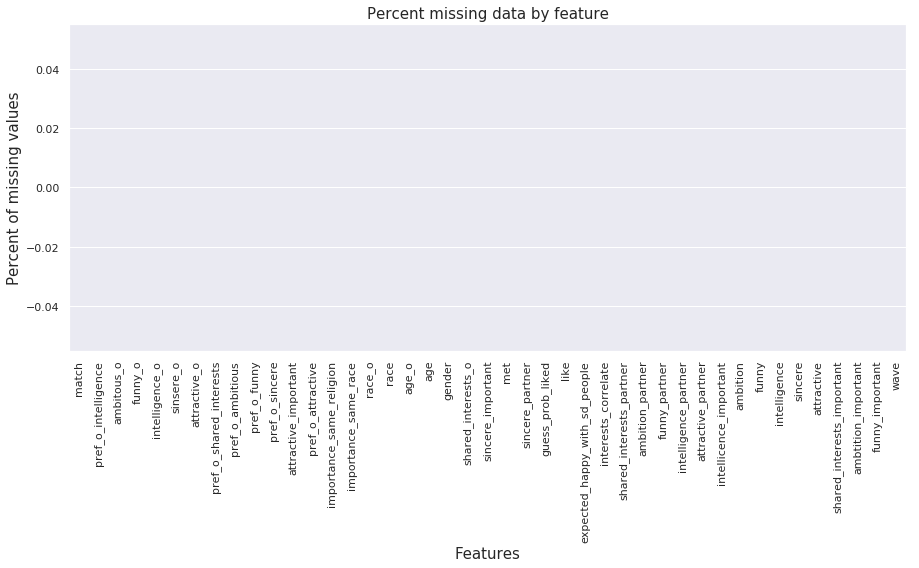

In [0]:
# Dropping the row with missing values in 'met'
new_data.dropna(how = 'any',inplace = True)

# Statistical details of missing values in new_data
total = new_data.isnull().sum().sort_values(ascending=False)
percent = (new_data.isnull().sum()/new_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

### Label Encoding

In [0]:
# Label encoding on the 'race'
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
new_data["race_code"] = lb_make.fit_transform(new_data["race"])
new_data[["race", "race_code"]].head(15)

# Label encoding on the 'race_o'
new_data["race_o_code"] = lb_make.fit_transform(new_data["race_o"])
new_data[["race_o", "race_o_code"]].head(15)

# Label encoding on 'gender'
new_data["gender_code"] = lb_make.fit_transform(new_data["gender"])
new_data[["gender", "gender_code"]].head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,gender,gender_code
0,female,0
1,female,0
2,female,0
3,female,0
4,female,0
5,female,0
6,female,0
8,female,0
9,female,0
10,female,0


In [0]:
# Dropping 'race', 'race_o' and 'gender' 
new_dating_data = new_data.drop(columns=['race','race_o', 'gender'])

new_dating_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 8377
Data columns (total 43 columns):
wave                             7829 non-null int64
age                              7829 non-null float64
age_o                            7829 non-null float64
importance_same_race             7829 non-null float64
importance_same_religion         7829 non-null float64
pref_o_attractive                7829 non-null float64
pref_o_sincere                   7829 non-null float64
pref_o_intelligence              7829 non-null float64
pref_o_funny                     7829 non-null float64
pref_o_ambitious                 7829 non-null float64
pref_o_shared_interests          7829 non-null float64
attractive_o                     7829 non-null float64
sinsere_o                        7829 non-null float64
intelligence_o                   7829 non-null float64
funny_o                          7829 non-null float64
ambitous_o                       7829 non-null float64
shared_interest

### Feature Selection

In [0]:
#Separate labels from the dataset
X = new_dating_data.drop(columns=['match'],axis=1)
y = new_dating_data['match']

X1 = new_dating_data.drop(columns=['match'],axis=1)
y1 = new_dating_data['match']

In [0]:
#Univariate selection.1 of features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif#ANOVA F-value between label/feature for classification tasks


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                       Specs       Score
36                      like  772.596869
14                   funny_o  591.123589
31             funny_partner  566.364895
11              attractive_o  563.683997
28        attractive_partner  542.965982
37          guess_prob_liked  533.855684
16        shared_interests_o  371.553349
33  shared_interests_partner  361.200285
12                 sinsere_o  206.942514
30      intelligence_partner  206.143022
13            intelligence_o  205.033858
29           sincere_partner  198.415778


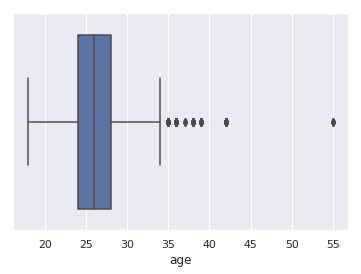

In [0]:
# Explore feature distribution in box plot
sns.boxplot(x='age', data=new_dating_data);

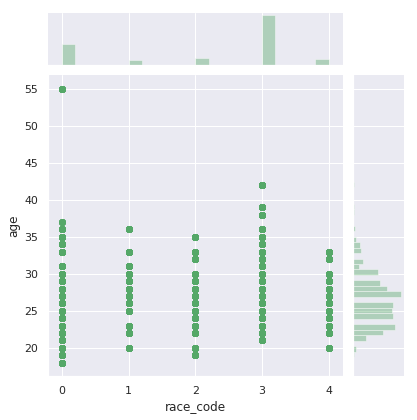

In [0]:
# Comparison between 'age' and 'age_o'
sns.jointplot(x='race_code', y='age', 
              data=new_dating_data, kind='scatter', color="g");

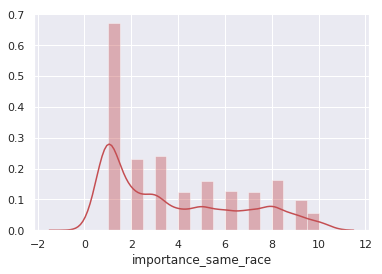

In [0]:
# Explore feature distribution in 'importance_same_race'
sns.distplot(new_dating_data['importance_same_race'], color="r");

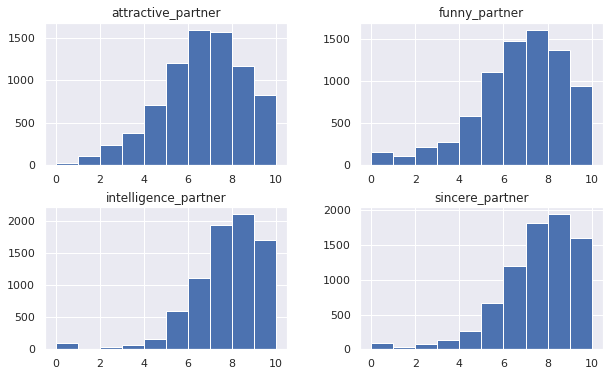

In [0]:
# Explore feature distribution in histograms
features = ['attractive_partner', 'funny_partner', 'intelligence_partner', 'sincere_partner']
new_dating_data[features].hist(figsize=(10, 6));

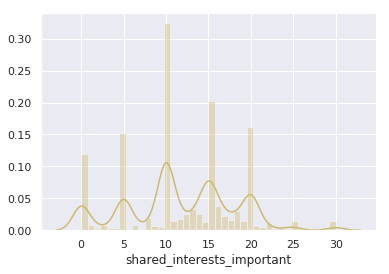

In [0]:
# Explore feature distribution in 'shared_interests_important'
sns.distplot(new_dating_data['shared_interests_important'], color="y");

In [0]:
#Univariate selection.2  of features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif#mutual information for a discrete target

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                         Specs     Score
36                        like  0.050202
31               funny_partner  0.043893
11                attractive_o  0.042844
14                     funny_o  0.039945
28          attractive_partner  0.038148
16          shared_interests_o  0.036747
33    shared_interests_partner  0.035551
37            guess_prob_liked  0.031688
29             sincere_partner  0.016885
12                   sinsere_o  0.012933
34         interests_correlate  0.011108
22  shared_interests_important  0.011047


In [0]:
#Univariate selection.3  of features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#F-value between label/feature for regression tasks
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                       Specs       Score
36                      like  772.596869
14                   funny_o  591.123589
31             funny_partner  566.364895
11              attractive_o  563.683997
28        attractive_partner  542.965982
37          guess_prob_liked  533.855684
16        shared_interests_o  371.553349
33  shared_interests_partner  361.200285
12                 sinsere_o  206.942514
30      intelligence_partner  206.143022
13            intelligence_o  205.033858
29           sincere_partner  198.415778


[0.01997345 0.02088237 0.01984769 0.01884393 0.01766741 0.01839687
 0.02021759 0.02200856 0.02194197 0.02193747 0.02156247 0.04830327
 0.01978929 0.02391392 0.04764028 0.02204144 0.0413821  0.01887827
 0.02024605 0.02064204 0.02076303 0.01777175 0.01751791 0.01950829
 0.0175108  0.01813886 0.01708025 0.02044321 0.03985249 0.02028023
 0.02130538 0.04105405 0.0174387  0.02829806 0.01987942 0.0170144
 0.05642056 0.04218808 0.01136643 0.01744128 0.01905056 0.01355982]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


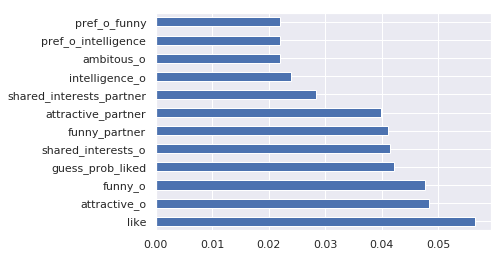

In [0]:
#Extra Tree Classifier
#Feature importance gives a score for each feature of your data, 
#the higher the score the more important or relevant is the feature towards your output variable.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [0]:
#keep_cols = [36,14,31,11,28,37,16,33,12,30,13,29]
# first selection

# second selection

# third selection

# tree selection
keep_col_names = ['pref_o_attractive','pref_o_shared_interests','age_o','sinsere_o','shared_interests_partner','funny_partner','guess_prob_liked','attractive_o','attractive_partner','funny_o','shared_interests_o','like','match']


#keep_col_names = ['like','funny_o','funny_partner','attractive_o','attractive_partner','guess_prob_liked','shared_interests_o','shared_interests_partner','sinsere_o','intelligence_partner','intelligence_o','sincere_partner','match']

dating_data_reduced = new_dating_data[keep_col_names]

In [0]:
dating_data_reduced.head()

,pref_o_attractive,pref_o_shared_interests,age_o,sinsere_o,shared_interests_partner,funny_partner,guess_prob_liked,attractive_o,attractive_partner,funny_o,shared_interests_o,like,match
0,35.0,5.0,27.0,8.0,5.0,7.0,6.0,6.0,6.0,8.0,6.0,7.0,0
1,60.0,0.0,22.0,8.0,6.0,8.0,5.0,7.0,7.0,7.0,5.0,7.0,0
2,19.0,12.0,22.0,10.0,7.0,8.0,0.0,10.0,5.0,10.0,10.0,7.0,1
3,30.0,5.0,23.0,8.0,8.0,7.0,6.0,7.0,7.0,8.0,8.0,7.0,1
4,30.0,20.0,24.0,7.0,6.0,7.0,6.0,8.0,5.0,6.0,7.0,6.0,1


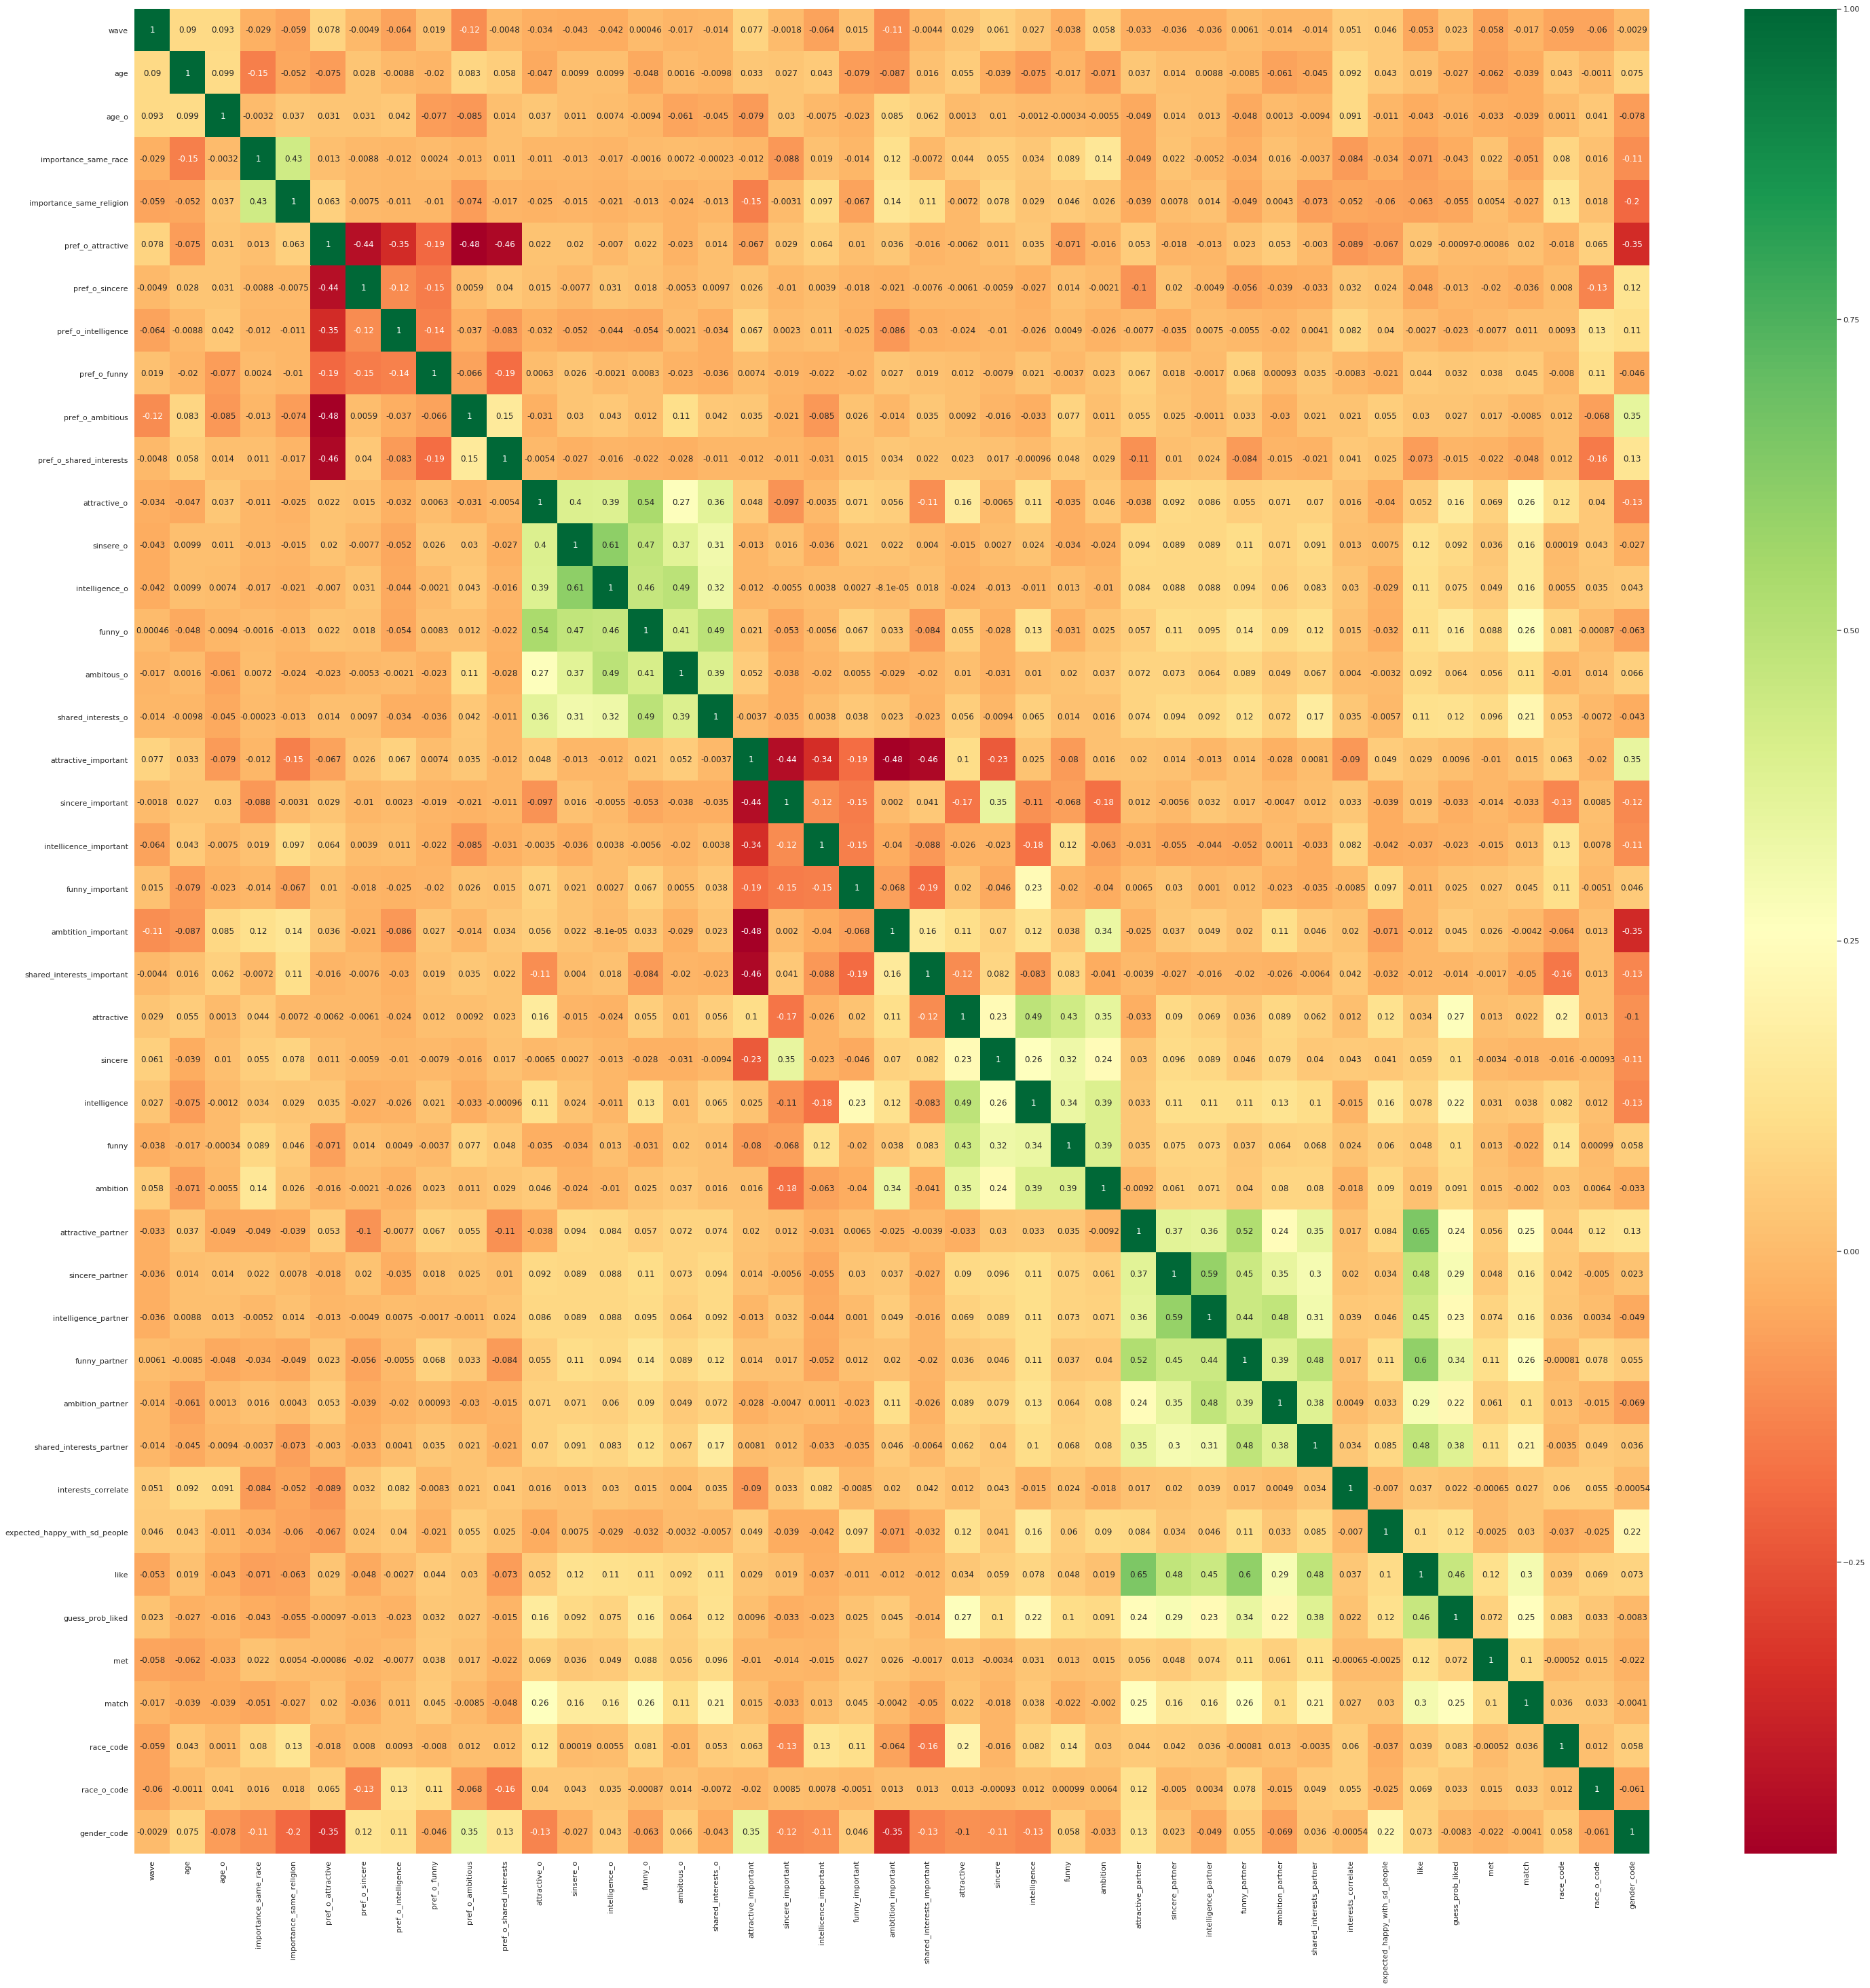

In [0]:
#Correlation matrix
import seaborn as sns
corrmat = new_dating_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(new_dating_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Model 1 - Support Vector Machine

In [0]:
# importing required libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# splitting the dataset
from sklearn.model_selection import train_test_split
svm_train_data, svm_test_data = train_test_split(new_dating_data, test_size=0.2)


In [0]:
# shape of the dataset
print('Shape of training data :',svm_train_data.shape)
print('Shape of testing data :',svm_test_data.shape)

Shape of training data : (6263, 43)
Shape of testing data : (1566, 43)


In [0]:
# seperate the independent and target variable on training data
svm_train_x = svm_train_data.drop(columns=['match'],axis=1)
svm_train_y = svm_train_data['match']

# seperate the independent and target variable on testing data
svm_test_x = svm_test_data.drop(columns=['match'],axis=1)
svm_test_y = svm_test_data['match']

In [0]:
# create the object of the Support Vector Classifier model
model = SVC()

# fit the model with the training data
model.fit(svm_train_x,svm_train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
# predict the target on the train dataset
svm_predict_train = model.predict(svm_train_x)
print('Target on train data',svm_predict_train) 

# Accuray Score on train dataset
svm_accuracy_train = accuracy_score(svm_train_y,svm_predict_train)
print('accuracy_score on train dataset : ', svm_accuracy_train)

In [0]:
# predict the target on the test dataset
svm_predict_test = model.predict(svm_test_x)
print('Target on test data',svm_predict_test) 

# Accuracy Score on test dataset
svm_accuracy_test = accuracy_score(svm_test_y,svm_predict_test)
print('accuracy_score on test dataset : ', svm_accuracy_test)

In [0]:
# Evaluation
from sklearn.metrics import average_precision_score

y_score = model.decision_function(svm_test_x)
average_precision = average_precision_score(svm_test_y, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [0]:
#>>> from sklearn.metrics import classification_report
#>>> y_true = [0, 1, 2, 2, 2]
#>>> y_pred = [0, 0, 2, 2, 1]
#>>> target_names = ['class 0', 'class 1', 'class 2']
#>>> print(classification_report(y_true, y_pred, target_names=target_names))

from sklearn.metrics import classification_report
print(classification_report(svm_test_y, svm_predict_test))

### Model 2 - Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score
train, test = train_test_split(
        dating_data_reduced, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)
#separate the label from training data
train_x = train.drop(columns=['match'],axis=1)
train_y = train['match']

#separate the label from test data
test_x = test.drop(columns=['match'],axis=1)
test_y = test['match']

rfc_b = RFC()
rfc_b.fit(train_x, train_y)
y_pred = rfc_b.predict(train_x)
print('Train accuracy score:',accuracy_score(train_y,y_pred))
print('Test accuracy score:', accuracy_score(test_y,rfc_b.predict(test_x)))

Train accuracy score: 0.9857895577199425
Test accuracy score: 0.8422733077905492


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
labels = np.array(new_dating_data.pop('match'))
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in rfc_b.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')



Average number of nodes 1651
Average maximum depth 23


In [0]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = rfc_b.predict(train_x)
train_rf_probs = rfc_b.predict_proba(train_x)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = rfc_b.predict(test_x)
rf_probs = rfc_b.predict_proba(test_x)[:, 1]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_y, rf_predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1306
           1       0.55      0.27      0.37       260

    accuracy                           0.84      1566
   macro avg       0.71      0.61      0.64      1566
weighted avg       0.82      0.84      0.82      1566



Recall Baseline: 1.0 Test: 0.23 Train: 0.92
Precision Baseline: 0.17 Test: 0.59 Train: 1.0
Roc Baseline: 0.5 Test: 0.77 Train: 1.0


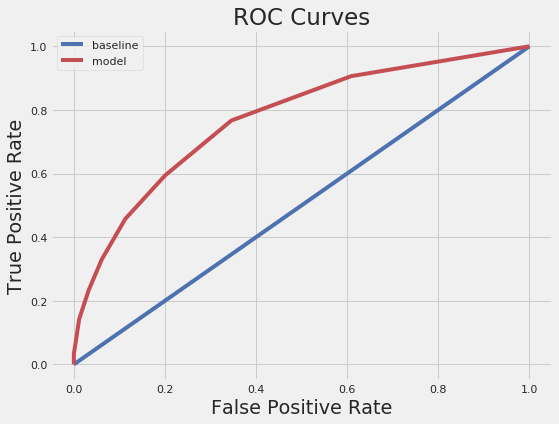

<Figure size 432x288 with 0 Axes>

In [0]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_y, 
                                     [1 for _ in range(len(test_y))])
    baseline['precision'] = precision_score(test_y, 
                                      [1 for _ in range(len(test_y))])
    baseline['roc'] = 0.5
    
    results = {}
    results['recall'] = recall_score(test_y, predictions)
    results['precision'] = precision_score(test_y, predictions)
    results['roc'] = roc_auc_score(test_y, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_y, train_predictions)
    train_results['precision'] = precision_score(train_y, train_predictions)
    train_results['roc'] = roc_auc_score(train_y, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
        
      # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_y, [1 for _ in range(len(test_y))])
    model_fpr, model_tpr, _ = roc_curve(test_y, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();
    
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')  

#### Dropping Features

To begin, we attempted to reduce the number of features from 123 to a more managable number.

Using the information provided with the dataset, we were able to eliminate features due to them being duplicate or redundant. 

For example, the column 'd_age' represented the difference in the age of the partners. This column was calculated by taking the difference of two other features, 'age' and 'age_o', thereby making it redundant. Many features were also duplicates, as they were copies of numerical columns grouped into 'bins'. We decided to drop these too.

#### Missing Values

We used many approaches to deal with the missing values. First, we visualised which features were most affected by missing values.

<img src="https://i.ibb.co/vm4FW4Y/Screen-Shot-2019-09-24-at-11-16-09-am.png" alt="Screen-Shot-2019-09-24-at-11-16-09-am" border="0">

We then dropped rows from the dataset that did not meet a minimum threshold for non-missing values. We set this threshold at roughly 85%. This resulted in less than 5% of the dataset being excluded.



```
new_data = dd_dropped.dropna(axis = 0, how ='any',thresh=37)
```



We then filled the remaining values using two approaches: filling with zero or with a median value where applicable. 

An example: Participants were asked to rank the importance of five partner attributes by allocating 100 points across the five categories. For some participants, if they did not value a particular attribute at all, they left the field blank rather than putting a zero. In our dataset this was considered a missing value. We could confidently allocate these fields with zeros.

#### Label Encoding

Some of the models we wished to experiment with required categorical variables to be represented in a numerical form. We encoded these variables using the following:



```
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
new_data["race_code"] = lb_make.fit_transform(new_data["race"])
new_data[["race", "race_code"]].head(15)
```



### Model 3 - K-nearest Neighbour

In [0]:
#importing KNN and creating KNN model object with number of neighbors n_neighbors=10
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)# weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
from sklearn.metrics import accuracy_score

#splitting the data on training and test subsets done in Random forest model section



In [0]:
#shape of subsets
print('Training data :',train.shape)
print('Testing data :',test.shape)

Training data : (6263, 43)
Testing data : (1566, 43)


In [0]:
#separate the label from training data
train_x = train.drop(columns=['match'],axis=1)
train_y = train['match']

#separate the label from test data
test_x = test.drop(columns=['match'],axis=1)
test_y = test['match']

In [0]:
#run the KNN model and output the train accuracy and test accuracy score
knn.fit(train_x,train_y)
y_pred = knn.predict(train_x)
print('Train accuracy score:',accuracy_score(train_y,y_pred))
print('Test accuracy score:',accuracy_score(test_y,knn.predict(test_x)))

Train accuracy score: 0.8534248762573846
Test accuracy score: 0.8384418901660281


In [0]:
#selecting the best K number in range between 1-25
from sklearn import metrics
k_range=range(1,26)
scores = []
for k in k_range:
  knn1 = KNeighborsClassifier(n_neighbors=k)
  knn1.fit(train_x, train_y)
  y1_pred = knn1.predict(test_x)
  scores.append(metrics.accuracy_score(test_y, y1_pred))
print(scores)

[0.7656449553001277, 0.8256704980842912, 0.8122605363984674, 0.8390804597701149, 0.8295019157088123, 0.8384418901660281, 0.8352490421455939, 0.8416347381864623, 0.8409961685823755, 0.8403575989782887, 0.8378033205619413, 0.8422733077905492, 0.8422733077905492, 0.8409961685823755, 0.8422733077905492, 0.8416347381864623, 0.8441890166028098, 0.8397190293742018, 0.8409961685823755, 0.8384418901660281, 0.8390804597701149, 0.8378033205619413, 0.8378033205619413, 0.8371647509578544, 0.8378033205619413]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_y, rf_predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1306
           1       0.68      0.21      0.32       260

    accuracy                           0.85      1566
   macro avg       0.77      0.59      0.62      1566
weighted avg       0.83      0.85      0.82      1566



Text(0, 0.5, 'Testing Accuracy')

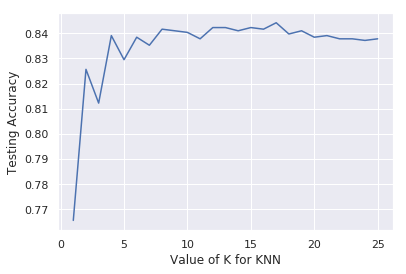

In [0]:
#the graph represents the variations for K number with conclusion that 
#testing accuracy penalizes models that are too complex or not complex enough
#the best choice of K number is between 8 and 16 with testing accuracy reaching 0.84.
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


#####KNN 10 neighbors results (the best choice):

Train accuracy score: 0.8468744677227048
Test accuracy score: 0.8386108273748724 

#####KNN 5 neighbors results:

Train accuracy score: 0.8673139158576052
Test accuracy score: 0.8263534218590398

### Model 4 - Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
logreg_y_pred = logreg.predict(train_x)
logreg_y_pred_test = logreg.predict(test_x)
print('Train accuracy score:' ,accuracy_score(train_y, logreg_y_pred))
print('Test accuracy score:' ,accuracy_score(test_y, logreg_y_pred_test))


Train accuracy score: 0.8550215551652562
Test accuracy score: 0.8454661558109834


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_y, logreg_y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1306
           1       0.58      0.26      0.36       260

    accuracy                           0.85      1566
   macro avg       0.72      0.61      0.64      1566
weighted avg       0.82      0.85      0.82      1566



### Model 5 - XGBoost

In [0]:
from xgboost import XGBClassifier
#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(train_x, train_y)

# make predictions for test set
xg_y_pred = model.predict(test_x)
predictions = [round(value) for value in xg_y_pred]

accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.38%


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1306
           1       0.60      0.35      0.45       260

    accuracy                           0.85      1566
   macro avg       0.74      0.65      0.68      1566
weighted avg       0.83      0.85      0.84      1566



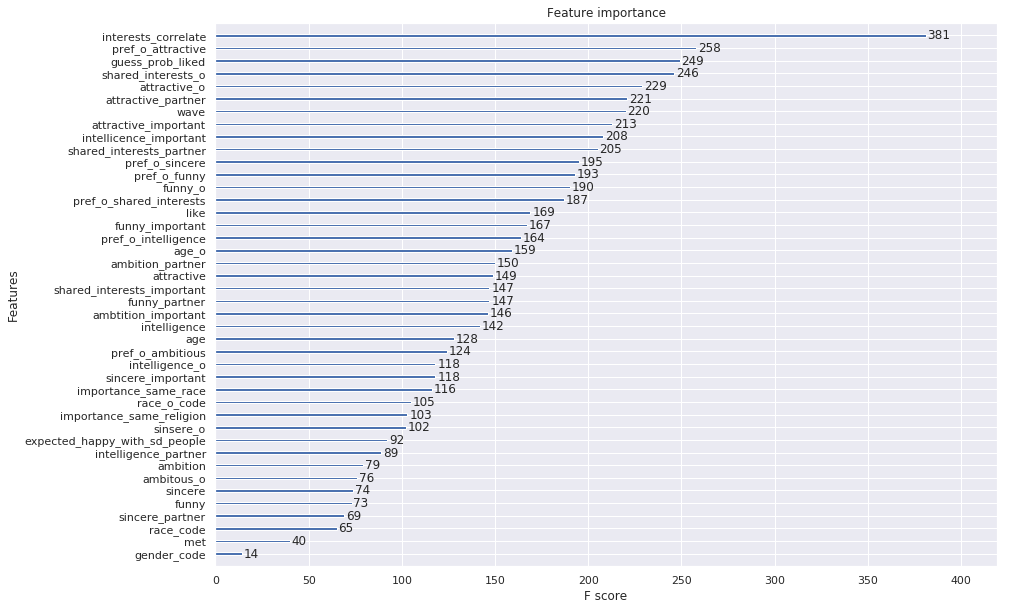

In [0]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plt.rcParams["figure.figsize"] = (14, 10)
plot_importance(model)
plt.show() 

# Assignment 2: Practical Machine Learning Project
## 31005 Machine Learning
### Group Members:

* Kate Moran 12403147

* Hsin-Wei Weng 11094253

* Tetiana Kraay 12605109




## Introduction

Selecting mates based on preferences has long existed in human history ever since the biology evolutionary. As the forms of societies have become more sophisticated, preferences for mates based on factors from economics, sociology or psychology have also evolved. Predicting the potential compatibility between two people and simplifying the process of 'matching' individuals has become an area of interest for many investigators like us who wish to provide a potential solution to assist people in finding their perfect mates.

The dataset is taken from the [speed dating market experiment](https://www.openml.org/d/40536) conducted in 2016. The experiment aimed to identify the determinants of mate choices and to observe differences in dating preferences between men and women. Nevertheless, for our project, we decided to use the dataset to predict the 'match' class, that is whether both partners wished to meet again (represented by a '1'). We experimented with a number of existing classification methods.

This report looks at the initial exploration of the dataset, where we identified and discussed potential challenges. We then described the methodology we have undertook including the types of processes, techniques and algorithms we applied. Afterwards, we evaluated the models’ performance based on the results. Finally, we concluded with a brief discussion on reflections and proposed relevant recommendation. In addition, we further explored potential social issues related to the application of such technique in the dating domain.





## Exploration

This section covers the initial exploration of the dataset, data cleaning tasks undertaken, the data structure, chosen data models and structure of testing.

### Initial Exploration





After loading in the CSV file, we took our first look at the dataset using the head() function and examined the first five rows:
```
dating_data.head()
```

<img src="https://i.ibb.co/Gxs7nvc/Screen-Shot-2019-09-24-at-10-58-36-am.png" alt="Screen-Shot-2019-09-24-at-10-58-36-am" border="0">

We recognised that our first challenge would be the **number of features** in the dataset, with 123 features. We then took a closer look at the remaining features using:
```
dating_data.info(verbose=True, null_counts=True)
```

<img src="https://i.ibb.co/k8sjvhN/Screen-Shot-2019-09-24-at-11-11-26-am.png" alt="Screen-Shot-2019-09-24-at-11-11-26-am" border="0" width="500">

From the above information, we identified that many of the remaining features had **missing values**. With a closer look in the actual dataset, we found that these missing values were marked with '?', another challenge we needed to address.

To beging with the data cleaning, we executed a series of codes in Python to generate detailed statistical information about the dataset. We also did some exploration through visuals to gain a better sense of the dataset overall.

### Data Cleaning

#### Dropping Features

Firstly, we attempted to reduce the number of features from 123 to a more managable number. Using the information provided with the dataset, we were able to eliminate features due to them being duplicate or redundant. For example, the column 'd_age' represented the difference in the age of the partners. This column was calculated by taking the difference of two other features, 'age' and 'age_o', thereby making it redundant. Many features were also duplicates, as they were copies of numerical columns grouped into 'bins'. We decided to drop these too.

#### Missing Values

Initially, we plotted a figure to get a rough idea of how many missing values there were and which features they were affecting.

<img src="https://i.ibb.co/Fb9b6Rn/download.png" alt="download" border="0">

We then used various approaches to manage these missing values. Firstly, we dropped rows from the dataset that did not meet a minimum threshold for non-missing values. We set this threshold at roughly 85%. This resulted in less than 5% of the dataset being excluded. We then filled the remaining values using two approaches: filling with zero or with a median value where applicable. 

An example: Participants were asked to rank the importance of five partner attributes by allocating 100 points across the five categories. For some participants, if they did not value a particular attribute at all, they left the field blank rather than putting a zero. In our dataset this was considered a missing value. We could confidently allocate these fields with zeros.

#### Label Encoding

Some of the models we wished to experiment with required categorical variables to be represented in a numerical form. We encoded these variables using the following:



```
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
new_data["race_code"] = lb_make.fit_transform(new_data["race"])
new_data[["race", "race_code"]].head(15)
```

The race_code is represented as following:

0: Asian/Pacific Islander/Asian-American

1: Black/African American

2: Latino/Hispanic American

3: European/Caucasian-American

4: Other


The data cleaning at this stage is completed.

### Visual Data Exploration

To obtain further insights from the dataset, we have plotted some features in histograms and box plot as shown in the following.  


Taking the feature ‘age’ and ‘race_code’ into consideration, it appears that the majority of the subjects are European/Caucasian-American (3) or Asian/Pacific Islander/Asian-American (0) whereas  Latino/Hispanic American (2) and Black/African American (1) are the minority.  In addition, most subjects are in their typical mating age between 24 and 34 with some subjects with much older age.

```
sns.distplot(new_dating_data['race_code']);
```

<img src="https://i.ibb.co/0Jb7MT2/download-3.png" alt="download-3" border="0">


```
sns.boxplot(x='age', data=new_dating_data);
```

<img src="https://i.ibb.co/GQwd2kG/download-1.png" alt="download-1" border="0">


When it comes to the subjects’ preferences for their ideal mates, race does not seem as important as we might have expected. On the other hand, shared interests seem to be influencing factors in the dating decisions as shown below. Moreover, most subjects also placed greater importance on the attractiveness, intelligence, funniness and sincereness for their ideal mates.  

```
sns.distplot(new_dating_data['importance_same_race'], color="r");
```

<img src="https://i.ibb.co/VCNGCX2/download-1.png" alt="download-1" border="0">


```
sns.distplot(new_dating_data['shared_interests_important'], color="y");
```

<img src="https://i.ibb.co/x6qjBMp/download-2.png" alt="download-2" border="0">



```
features = ['attractive_partner', 'funny_partner', 'intelligence_partner', 'sincere_partner']
new_dating_data[features].hist(figsize=(10, 6));
```

<img src="https://i.ibb.co/28H4qyD/download-4.png" alt="download-4" border="0">



### Data Structure



For this project, we decided to store the speed dating dataset in a pandas DataFrame, as we wished to use the pandas library to conduct inital exploration and cleaning. DataFrames are also compatible with the Scikit-Learn library which we will use for building and testing models.

### Data Models

We selected certain models that we considered to be suitable for the chosen dataset. All chosen models are supervised training methods as we have labelled training data. The size of the dataset was also be taken into consideration when determining suitability of each model.

After careful selection, we chose to experiment with the following algorithms:

*   Support Vector Machine
*   Random Forest
*   K-Nearest Neighbour
*   Gradient Boosting - XGBoost
*   Logistic Regression

For the implementation, we chose to employ the Scikit-Learn Python library based on its availbility of models as well as its capability and ease for fine-tuning parameters and evaluation.





### Tests

To evaluate the models, we decided to generate the classification report using scikit-learn. This report provides metrics for precision, recall and f1-score.

## Methodology

### Preparation for Model Building

#### Data / Label Split

We split the last column 'match' from the rest of the data and assigned it to 'y'. 

```
X = new_dating_data.drop(columns=['match'],axis=1)
y = new_dating_data['match']
```



#### Training /  Testing  Split

We then split the data into a training and test set using the train_test_split function. We partitioned the data, taking 20% to testing.

```
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(new_dating_data, test_size=0.2)
```



#### Feature Selection



Feature Selection is an important process in machine learning and has the potential to significantly impact the performance of the models. The inclusion of irrelevant features can negatively impact model performance. Feature Selection is the process of selecting those features that will contribute the most to your prediction variable or output you are interested in. 

The benefits of feature selection is that it:

* Reduces Overfitting: less redundant data means less opportunity  to make decisions based on noise.
* Improves Accuracy:  less misleading data means modeling accuracy improves.
* Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

We performed univariate selection using the SelectKBest class in scikit-learn. This class can be used with a number of different statistical tests. We chose to use the following three tests to select the best twelve features, with their docs description:

* f_classif - ANOVA F-value between label / feature for classification tasks.
* mutual_info_classif - mutual information for a discrete target.
* f_regression - F-value between label / feature for regression tasks.

Below is a screenshot of the output for the f-regression test:

<img src="https://i.ibb.co/J5F2WW5/Screen-Shot-2019-09-24-at-12-31-51-pm.png" alt="Screen-Shot-2019-09-24-at-12-31-51-pm" border="0" width="350">

We also generated a correlation matrix with a heatmap overlay to assess which features were most correlated with our target variable 'match'. To enable zooming in, click the image:

<a href="https://i.ibb.co/6BJBhMJ/download.png">
<img src="https://i.ibb.co/6BJBhMJ/download.png" alt="download" border="0">
</a>

### Models in Details

The model selection for Speed Dating dataset is based on the following guidelines:

•	Building the model for supervised learning in which the data comes with additional attributes that we want to predict – Random Forest and Gradient Boosting are the best choice

•	Type of the learning problem: whether it is classification or regression. In the Speed dating dataset the learnig problem is defined as classification where the target attribute has two classes, i.e. binary – Logistic Regression and SVM

•	Two class classification – target attribute has two classes, i.e. binary – Logistic Regression and SVM

•	The simplest or easiest model category to use – Random Forest and Gradient Boosting.

**Support Vector Machine**

SVM is well known for performing both classification and regression. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points. In the experiment we use sklearn library for creating svm model. SVM model then fit with training data and tested after on test subset. Training accuracy is 0.99 and test accuracy is 0.83 that shows overfitting of the model for the dataset. The metric average precision-recall score is used to evaluate the model and is equal to 0.32 which is quite low and correspond to low performance of the model that can be caused by overfitting. Overfitting issue is also confirmed by results of the classification report.

**Random Forest**

Random Forest is ensemble classification method which implements a collection of decision trees where each tree gives a classification and the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest). Random forest model is imported from sklearn library as RFC. After fitting RFC with training and split data the results are followed: train accuracy score is 0.98, test accuracy score is 0.84. Different combinations of splitting the dataset on training and test subset are used, however it does not affect the accuracy significantly. The model shows overfitting where testing of unseen data performs poorer showing lower accuracy comparing to training accuracy. 

**K-nearst Neighbor**

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors.  KNeighborsClassifier model is imported from sklearn library with next parameters: k=5 (number of neighbors), weights = uniform (points in each neighborhood are weighted equally), algorithm = auto (the most appropriate algorithm id decided automatically based on the values passed to fit method). The results of running KNN model for Speeding Dating dataset is followed: train accuracy score is 0.85, test accuracy score is 0.83. It is a good performance, no overfitting. One of major challenges with KNN algorithm is to choose the K number of neigbors. K number is as a controlling variable for the prediction model. There are two methods to select the better K number: one is to pick the value for K and test the model with it assessing the model performance, then repeat with different K numbers. The other method is to allocate the better value of K number is use the accuracy_score metric and plot the graph with value of K against testing accuracy. As seen from the graph below the best choice of K number is in range 8-12 where the testing accuracy is 84%.Testing accuracy penalizes models that are too complex or not complex enough where the complexity is determined by the value of K (lower value = more complex).

<img src="https://i.ibb.co/JB9w8DQ/download-3.png" alt="download-3" border="0"></a>

**Logistic Regression**

Logistic Regression is used to estimate discrete values like binary values (match/no match) based on given set of independent variables and is one of the basic and popular algorithm to solve a classification problem. In our experiment we use LogisticRegression model imported from sklearn library. After fitting the model with training and split data we obtained the results for the accuracy: train accuracy score is 0.85, test accuracy score is 0.84 that shows the good performance of the model.

**XGBoost**

XGBoost model’s main benefits are that its highly scalable/parallelizable, quick to execute, and typically outperforms other algorithms. XGBClassifier is imported from XGBoost and the object of XGBClassifier is created. The model then is fit with training and split data with model parameters such as learning rate = 0.05 and max_depth=5 and trying to predict whether partners in speed dating will match or not. Manual adjustment is applied to the model with different learning rate, showing the best choice of 0.05. The accuracy is 86.06%. The extra module of XGBoost used in our experimentation is plot_importance which provides the f-score of each feature, showing how important the feature is for the model. It can be used in feature extraction to select the most important attributes of the dataset. The image below displays the graph generated by plot_importance module of XGBClassifier:

<a href="https://ibb.co/R9tC4LB"><img src="https://i.ibb.co/hyrK1pZ/download-2.png" alt="download-2" border="0" width="1000"/></a>


### Model Building

The basic process we  undertook for model building has been illustrated below using the code for our Linear Regressional model.

We start by importing the model from scikit-learn.
```
from sklearn.linear_model import LogisticRegression
```
We then create an instance of the model.

```
model = LogisticRegression()
```

We then fit the model using the training data.

```
model.fit(train_x, train_y)
```

We then use the fitted model to generate predictions for unseen test data.

```
y_pred_test = model.predict(test_x)
```

To check the accuracy of the model, we can use accuracy_score.

```
accuracy_store(test_y, y_pred_test)
```
Please see above Code Section for further specifications on how the models were built.

## Evaluation

The objective of a machine learning model is to generalize well to new data it has never seen before. To evaluate the performance of machine learning models used for classifying Speed Dating data, different techniques might be applied. We use classification report as the most useful for multiple task and when classes are imbalanced (as in Speed Dating dataset class “match” is much smaller than class “no match”). It includes recall, precision and f-score measurements. Precision is defined Precision (P) is defined as the number of true positives (Tp) over the number of true positives plus the number of false positives (Fp). Recall (R) is defined as the number of true positives (Tp) over the number of true positives plus the number of false negatives (Fn). These quantities are also related to the (F1) score, which is defined as the harmonic mean of precision and recall.

In the case with speed dating precision is a good measure to determine, when the costs of False Positive is high. In “match”/”no match” prediction a false positive means that a “no match” which is actual negative has been identified as “match”, and the results of classification can be misleading. Recall shows how high is the cost associated with False Negative when “match” is classified as “no match” and entails the date to be indicated as “not a good one” when it is actually successful in terms of the experiment and the potential match can be missed. F score is needed for measuring the balance between precision and recall. 

Classification report metric is imported from sklearn library and takes next parameters: true values for predicting classes and predicted values. The metric is applied to only 4 models: Random Forest, KNN model, Logistic Regression and XGBoos. We decided not to apply the metric to SVM because it previously showed the low average precision-recall score which means overfitting. The results of four classification reports are displayed below and illustrate quite uniform values for precision, recall and f score metrics. As previously described in Methodology section the issue with overfitting emerged in a few models, such as SVM and Random Forest, we decided to select three most suitable for Speed Dating dataset models: KNN, Logistic Regression and XGBoost. 


The following images are the classification reports produced by our models. The report provides figures for precision, recall and f1-score.


**RANDOM FOREST**

<img src="https://i.ibb.co/93T8bft/RANDOM.png" alt="RANDOM" border="1"  width="500">

**K-NEAREST NEIGHBOUR**

<img src="https://i.ibb.co/FJM72BG/KNN.png" alt="KNN" border="1" width="500">

**LOGISTIC REGRESSION**

<img src="https://i.ibb.co/n1DJ7M2/LINEAR.png" alt="LINEAR" border="1" width="500">

**XGBoost**

<img src="https://i.ibb.co/XJhR6Sr/XGBOOST.png" alt="XGBOOST" border="1" width="500">



## Conclusion

The greatest challenges for the chosen speed dating dataset lay in the large number of features and missing values. A considerable amount of time as a group we spent was on designing data structure including finding appropriate methods for data cleaning and determining features of importance. 

Overall, observing and analysing this dataset showed that most of the subjects who took part in the speed dating experiment chose not to meet again, which corresponds to the results of our predicting models. However, whether the dating preferences can be applied to long-term relationships and marriages is the question we are unable to answer entirely.

For suggestions, as the subjects in this speed dating dataset are from the same community, this technique should be employed to a wider population. This will allow a better understanding of dating preferences across diverse communities and groups.



## Social/Ethical Discussion

Incorporating uncertainty and learning, the predication models provided us a better understanding of the modern dating markets. The technique has the potential to reveal useful insights that can assist in making strategic dating decisions.  

The matching prediction algorithms based on dating preferences can be used to influence the results of matching and furthermore outcomes in the marriages which essentially form households. This in turn can greatly impact on the society across fields as diverse as evolutionary biology, economics, sociology and psychology. 

In particular, the application of this unchecked supervised machine learning to speed dating can easily run into social issues related to race. Preference on race could potentially changes the relations among society. Apart from user-generated biases due to stereotypes, racial preference in dating selection very much indicates that there are still lack of multiracial representation in the society. In addition, it is possible that such technique is misused to either completely castoff specific minorities or make members of certain groups are not visible to others of different groups, which can ultimately lead to social divide.

Moreover, such assortative mating technique can bring more inequality.  Through selection of dating preferences, participants of similar socioeconomical status in terms of income, education and occupation are more likely to ‘match’. Due to this embedded bias, the formation of such matches can certainly intensify the separation of wealth, resulting greater social inequality.  

Nevertheless, if applied in the right way, the technique can result in matching to be more robust and thus relationships are less likely to end quickly. Marriages that are formed on such basis of dating selection might have lower rates of marital breakup than those formed traditionally. More importantly, the technology could serve all of us significantly even in this dating domain.
 


## Video Pitch

Our video pitch is available on Youtube at:
https://youtu.be/uoFNtrkDoD4